# **DEEP LEARNING FOR COMPUTER SYSTEM**
# **Chapter 5: The Advanced CNN architectures**


## **ResNet implementation with Keras**

---

## 1. Import library

In [4]:
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dense, Add,\
                        Input, Dropout, BatchNormalization, Flatten, Activation
from keras.models import Model
from keras.utils import plot_model

## 2. Residual block

In [5]:
def residual_block(X, middle_kernel_size, filters, reduce=False, s=2):
  F1, F2, F3 = filters

  X_shortcut = X
  if reduce:
    # shortcut path
    X_shortcut = Conv2D(filters=F3, kernel_size=1, strides=s)(X_shortcut)
    X_shotcut = BatchNormalization(axis=3)(X_shortcut)

    # main path - component 1
    X = Conv2D(filters=F1, kernel_size=1, strides=s)(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
  else:
    # main path - component 1
    X = Conv2D(filters=F1, kernel_size=1)(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

  # main path - component 2
  X = Conv2D(filters=F2, kernel_size=middle_kernel_size, padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  # main path - component 3
  X = Conv2D(filters=F3, kernel_size=1)(X)
  X = BatchNormalization(axis=3)(X)

  # final step
  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)

  return X

## 3. Define the model's architecture

In [10]:
def ResNet50(input_shape, num_classes):
  X_input = Input(input_shape)

  # Stage 1
  X = Conv2D(64, 7, 2)(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D(3, 2)(X)

  # Stage 2
  X = residual_block(X, 3, [64, 64, 256], reduce=True, s=1)
  X = residual_block(X, 3, [64, 64, 256])
  X = residual_block(X, 3, [64, 64, 256])

  # Stage 3
  X = residual_block(X, 3, [128, 128, 512], reduce=True, s=2)
  X = residual_block(X, 3, [128, 128, 512])
  X = residual_block(X, 3, [128, 128, 512])
  X = residual_block(X, 3, [128, 128, 512])

  # Stage 4
  X = residual_block(X, 3, [256, 256, 1024], reduce=True, s=2)
  X = residual_block(X, 3, [256, 256, 1024])
  X = residual_block(X, 3, [256, 256, 1024])
  X = residual_block(X, 3, [256, 256, 1024])
  X = residual_block(X, 3, [256, 256, 1024])
  X = residual_block(X, 3, [256, 256, 1024])

  # Stage 5
  X = residual_block(X, 3, [512, 512, 2048], reduce=True, s=2)
  X = residual_block(X, 3, [512, 512, 2048])
  X = residual_block(X, 3, [512, 512, 2048])

  # Pooling
  X = AveragePooling2D(1)(X)

  # Output layer
  X = Flatten()(X)
  X = Dense(num_classes, activation='softmax')(X)

  model = Model(inputs=X_input, outputs=X, name='ResNet50')

  return model

In [11]:
model = ResNet50((32,32, 3), 10)
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_53 (Conv2D)          (None, 13, 13, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_53 (Ba  (None, 13, 13, 64)           256       ['conv2d_53[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_49 (Activation)  (None, 13, 13, 64)           0         ['batch_normalization_5

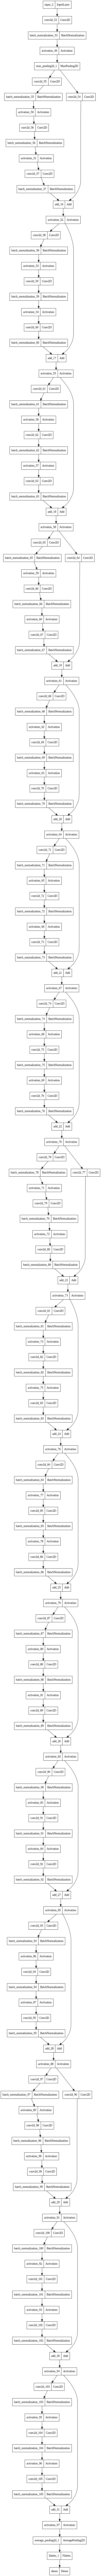

In [12]:
plot_model(model)